In [1]:
#GENERAL IMPORTS
#Goes down the list of tools located on https://arundo-adtk.readthedocs-hosted.com/en/latest/notebooks/demo.html
#Tools beyond "CustomizedDetector" are not implemented.
from pandas import read_csv
import pandas as pd
from mpl_toolkits import mplot3d
from adtk.data import validate_series
from adtk.detector import ThresholdAD
from adtk.visualization import plot

C:\Users\khoin\Anaconda3\envs\Py37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Load Patient 132539
fileName = "./imputed_format/"+ "132539_sub" +".csv"
s = read_csv(fileName, header=0, index_col=0, parse_dates=True, squeeze=True)
s = validate_series(s)

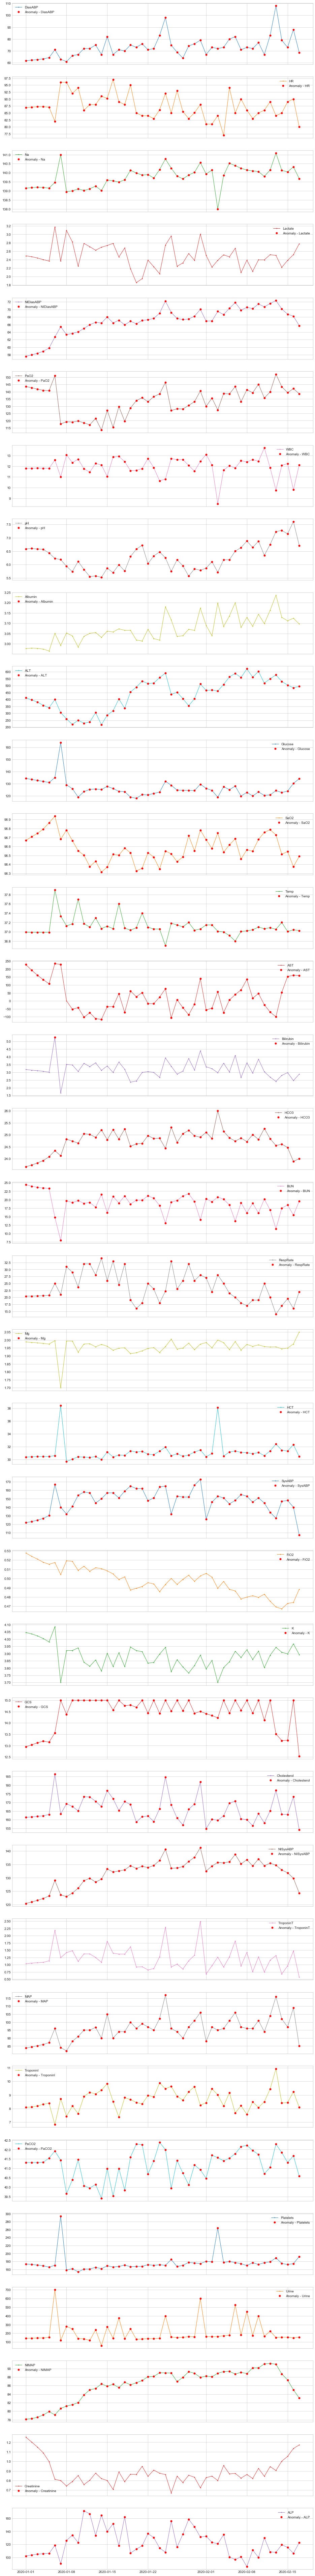

In [3]:
#ThresholdAD
from adtk.detector import ThresholdAD
threshold_ad = ThresholdAD(high=5, low=0)
anomalies = threshold_ad.detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

In [ ]:
#Quantile
from adtk.detector import QuantileAD
quantile_ad = QuantileAD(high=0.99, low=0.01)
anomalies = quantile_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

In [ ]:
#InterQuartileRangeAD
from adtk.detector import InterQuartileRangeAD
iqr_ad = InterQuartileRangeAD(c=1.5)
anomalies = iqr_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

In [ ]:
#GeneralizedESDTestAD
from adtk.detector import GeneralizedESDTestAD
esd_ad = GeneralizedESDTestAD(alpha=0.3)
anomalies = esd_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

In [ ]:
#PersistAD
from adtk.detector import PersistAD
persist_ad = PersistAD(c=3.0, side='positive')
anomalies = persist_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red');

In [ ]:
#Adjustments
persist_ad.window = 24
anomalies = persist_ad.fit_detect(s)
plot(s, anomaly=anomalies, anomaly_color='red');

In [ ]:
#LevelShiftAD
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=6.0, side='both', window=5)
anomalies = level_shift_ad.fit_detect(s)
plot(s, anomaly=anomalies, anomaly_color='red');

In [ ]:
#VolatilityShiftAD
from adtk.detector import VolatilityShiftAD
volatility_shift_ad = VolatilityShiftAD(c=6.0, side='positive', window=30)
anomalies = volatility_shift_ad.fit_detect(s)
plot(s, anomaly=anomalies, anomaly_color='red');

In [ ]:
#SeasonalAD (Exception: Could not find significant seasonality.)
from adtk.detector import SeasonalAD
seasonal_ad = SeasonalAD(c=3.0, side="both")
anomalies = seasonal_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2);

In [ ]:
#AutoregressionAD (RuntimeError: Valid values are not enough for training.)
from adtk.detector import AutoregressionAD
autoregression_ad = AutoregressionAD(n_steps=7*2, step_size=24, c=3.0)
anomalies = autoregression_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2);

In [ ]:
#MinClusterDetector
from adtk.detector import MinClusterDetector
from sklearn.cluster import KMeans
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=3))
anomalies = min_cluster_detector.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

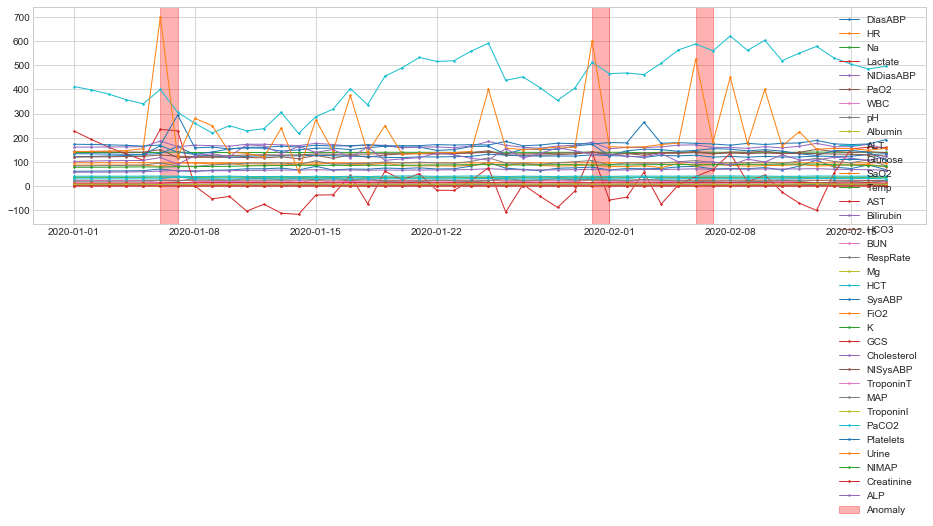

In [9]:
#OutlierDetector
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.05))
anomalies = outlier_detector.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

In [10]:
#RegressionAD
from adtk.detector import RegressionAD
from sklearn.linear_model import LinearRegression
regression_ad = RegressionAD(regressor=LinearRegression(), target="0", c=3.0)
anomalies = regression_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

RuntimeError: Cannot find target series 0 in input dataframe.

In [ ]:
#PcaAD
from adtk.detector import PcaAD
pca_ad = PcaAD(k=1)
anomalies = pca_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

In [4]:
#Correlation Plot
import seaborn as sn
import matplotlib.pyplot as plt
dataframe_collection = {}
dataframe_collection[0] = pd.read_csv("./imputed_correlation/"+ "132539" +".csv", encoding='unicode_escape')

In [5]:
dataframe_collection[0]

,Time,DiasABP,HR,Na,Lactate,NIDiasABP,PaO2,WBC,pH,Albumin,...,NISysABP,TroponinT,MAP,TroponinI,PaCO2,Platelets,Urine,NIMAP,Creatinine,ALP
0,0,61.758041,86.871184,139.146738,2.488638,57.619477,143.585653,11.796641,6.585196,2.977075,...,120.403872,1.032925,83.738303,8.094753,41.310469,173.412542,142.386294,78.113932,1.254320,102.389618
1,1,62.215657,87.090349,139.178597,2.468468,57.997042,142.782658,11.810764,6.601767,2.979214,...,120.956911,1.055712,84.450723,8.115780,41.305472,172.326184,143.936226,78.252186,1.202715,103.937187
2,2,62.702814,87.233512,139.195025,2.437990,58.425442,141.808623,11.824233,6.582699,2.978155,...,121.582018,1.069899,85.198289,8.186488,41.314336,170.841893,145.401226,78.568903,1.150475,105.065663
3,3,63.288891,87.268007,139.187663,2.398628,58.949107,140.956125,11.811795,6.568307,2.974434,...,122.289781,1.083319,86.003068,8.320687,41.324873,168.902952,147.032643,79.107504,1.090277,105.948279
4,4,64.356105,87.051227,139.150440,2.363155,59.798932,140.738299,11.809318,6.431445,2.965049,...,123.212939,1.134450,87.183336,8.390299,41.547416,165.620728,154.835430,79.907480,0.997928,106.324647
5,5,71.000000,82.000000,139.469730,3.177852,62.710383,151.075828,12.579874,6.232893,3.050780,...,128.997871,2.189503,96.000000,6.827063,41.921653,170.272076,699.999985,79.133181,0.813603,118.660235
6,6,63.000000,96.000000,141.000000,2.361771,65.435540,117.735739,11.000000,6.187258,2.992376,...,123.620077,1.244015,84.000000,8.728536,41.435172,293.999997,120.000000,80.661648,0.800000,90.714154
7,7,61.000000,96.000000,138.951803,3.092041,63.335425,119.274387,13.068031,5.939390,3.053051,...,122.967108,1.417234,82.000000,7.434543,39.651890,158.317809,280.000003,81.178772,0.743504,126.102019
8,8,66.000000,92.000000,138.999240,2.820354,63.683441,119.046983,12.344913,5.743901,3.038530,...,124.287264,1.482266,88.000000,8.189531,40.389572,161.649833,250.000003,81.524509,0.790118,134.085589
9,9,67.000000,94.000000,139.106037,2.242803,64.056598,119.763658,12.655055,6.119086,2.984647,...,126.107862,1.115107,91.000000,7.635696,41.462469,153.652482,139.982711,82.005275,0.852735,122.840546


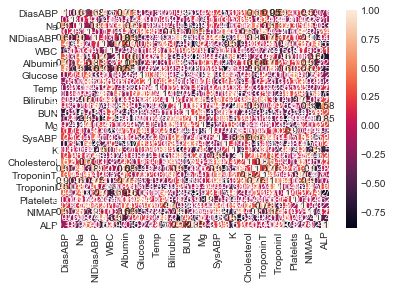

In [6]:
df = pd.DataFrame({'DiasABP':dataframe_collection[0]['DiasABP'], 'HR':dataframe_collection[0]['HR'], 'Na':dataframe_collection[0]['Na'], 'Lactate':dataframe_collection[0]['Lactate'], 'NIDiasABP':dataframe_collection[0]['NIDiasABP'], 'PaO2':dataframe_collection[0]['PaO2'], 'WBC':dataframe_collection[0]['WBC'], 'pH':dataframe_collection[0]['pH'], 'Albumin':dataframe_collection[0]['Albumin'], 'ALT':dataframe_collection[0]['ALT'], 'Glucose':dataframe_collection[0]['Glucose'], 'SaO2':dataframe_collection[0]['SaO2'], 'Temp':dataframe_collection[0]['Temp'], 'AST':dataframe_collection[0]['AST'], 'Bilirubin':dataframe_collection[0]['Bilirubin'], 'HCO3':dataframe_collection[0]['HCO3'], 'BUN':dataframe_collection[0]['BUN'], 'RespRate':dataframe_collection[0]['RespRate'], 'Mg':dataframe_collection[0]['Mg'], 'HCT':dataframe_collection[0]['HCT'], 'SysABP':dataframe_collection[0]['SysABP'], 'FiO2':dataframe_collection[0]['FiO2'], 'K':dataframe_collection[0]['K'], 'GCS':dataframe_collection[0]['GCS'], 'Cholesterol':dataframe_collection[0]['Cholesterol'], 'NISysABP':dataframe_collection[0]['NISysABP'], 'TroponinT':dataframe_collection[0]['TroponinT'], 'MAP':dataframe_collection[0]['MAP'], 'TroponinI':dataframe_collection[0]['TroponinI'], 'PaCO2':dataframe_collection[0]['PaCO2'], 'Platelets':dataframe_collection[0]['Platelets'], 'Urine':dataframe_collection[0]['Urine'], 'NIMAP':dataframe_collection[0]['NIMAP'], 'Creatinine':dataframe_collection[0]['Creatinine'], 'ALP':dataframe_collection[0]['ALP']})
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

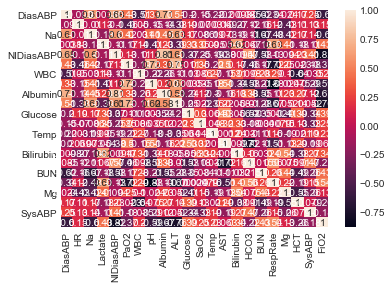

In [7]:
df = pd.DataFrame({'DiasABP':dataframe_collection[0]['DiasABP'], 'HR':dataframe_collection[0]['HR'], 'Na':dataframe_collection[0]['Na'], 'Lactate':dataframe_collection[0]['Lactate'], 'NIDiasABP':dataframe_collection[0]['NIDiasABP'], 'PaO2':dataframe_collection[0]['PaO2'], 'WBC':dataframe_collection[0]['WBC'], 'pH':dataframe_collection[0]['pH'], 'Albumin':dataframe_collection[0]['Albumin'], 'ALT':dataframe_collection[0]['ALT'], 'Glucose':dataframe_collection[0]['Glucose'], 'SaO2':dataframe_collection[0]['SaO2'], 'Temp':dataframe_collection[0]['Temp'], 'AST':dataframe_collection[0]['AST'], 'Bilirubin':dataframe_collection[0]['Bilirubin'], 'HCO3':dataframe_collection[0]['HCO3'], 'BUN':dataframe_collection[0]['BUN'], 'RespRate':dataframe_collection[0]['RespRate'], 'Mg':dataframe_collection[0]['Mg'], 'HCT':dataframe_collection[0]['HCT'], 'SysABP':dataframe_collection[0]['SysABP'], 'FiO2':dataframe_collection[0]['FiO2']})
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

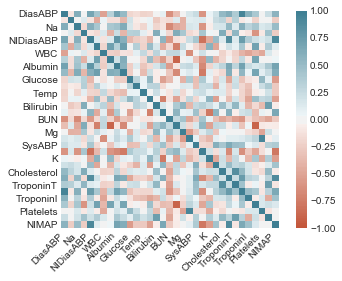

In [12]:
#Prettier?
df = pd.DataFrame({'DiasABP':dataframe_collection[0]['DiasABP'], 'HR':dataframe_collection[0]['HR'], 'Na':dataframe_collection[0]['Na'], 'Lactate':dataframe_collection[0]['Lactate'], 'NIDiasABP':dataframe_collection[0]['NIDiasABP'], 'PaO2':dataframe_collection[0]['PaO2'], 'WBC':dataframe_collection[0]['WBC'], 'pH':dataframe_collection[0]['pH'], 'Albumin':dataframe_collection[0]['Albumin'], 'ALT':dataframe_collection[0]['ALT'], 'Glucose':dataframe_collection[0]['Glucose'], 'SaO2':dataframe_collection[0]['SaO2'], 'Temp':dataframe_collection[0]['Temp'], 'AST':dataframe_collection[0]['AST'], 'Bilirubin':dataframe_collection[0]['Bilirubin'], 'HCO3':dataframe_collection[0]['HCO3'], 'BUN':dataframe_collection[0]['BUN'], 'RespRate':dataframe_collection[0]['RespRate'], 'Mg':dataframe_collection[0]['Mg'], 'HCT':dataframe_collection[0]['HCT'], 'SysABP':dataframe_collection[0]['SysABP'], 'FiO2':dataframe_collection[0]['FiO2'], 'K':dataframe_collection[0]['K'], 'GCS':dataframe_collection[0]['GCS'], 'Cholesterol':dataframe_collection[0]['Cholesterol'], 'NISysABP':dataframe_collection[0]['NISysABP'], 'TroponinT':dataframe_collection[0]['TroponinT'], 'MAP':dataframe_collection[0]['MAP'], 'TroponinI':dataframe_collection[0]['TroponinI'], 'PaCO2':dataframe_collection[0]['PaCO2'], 'Platelets':dataframe_collection[0]['Platelets'], 'Urine':dataframe_collection[0]['Urine'], 'NIMAP':dataframe_collection[0]['NIMAP'], 'Creatinine':dataframe_collection[0]['Creatinine'], 'ALP':dataframe_collection[0]['ALP']})

corr = df.corr()
ax = sn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);